# Laboratorio No. 3

- Carlos López
- Josué Morales
- Brian Carrillo
- Marco Ramírez

## Ejercicio 1

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks


def rk4(t0, u0, dt, f):
    """
    RK4 toma un paso de Runge-Kutta para una EDO escalar.

    Parámetros:
    t0: flotante: la hora actual.
    u0: float: la estimación de la solución actual.
    dt: float: el paso de tiempo.
    f : función : La función que define la derivada.

    Devoluciones:
    u1: flotante: estimación de la solución de Runge-Kutta de cuarto orden en el momento t0 + dt.
    """
    f1 = f(t0, u0)
    f2 = f(t0 + dt / 2.0, u0 + dt * f1 / 2.0)
    f3 = f(t0 + dt / 2.0, u0 + dt * f2 / 2.0)
    f4 = f(t0 + dt, u0 + dt * f3)
    u1 = u0 + dt * (f1 + 2.0 * f2 + 2.0 * f3 + f4) / 6.0
    return u1

def rk4vec(t0, u0, dt, f):
    """
    RK4VEC toma un paso de Runge-Kutta para una EDO vectorial.

    Parámetros:
    t0: flotante: la hora actual.
    m : int : La dimensión espacial.
    u0: matriz: la estimación de la solución en el momento actual.
    dt: float: el paso de tiempo.
    f : función : La función que define la derivada.

    Devoluciones:
    u: matriz: estimación de la solución de Runge-Kutta de cuarto orden en el momento t0 + dt.
    """
    f0 = f(t0, u0)

    t1 = t0 + dt / 2.0
    u1 = u0 + dt * f0 / 2.0
    f1 = f(t1, u1)

    t2 = t0 + dt / 2.0
    u2 = u0 + dt * f1 / 2.0
    f2 = f(t2, u2)

    t3 = t0 + dt
    u3 = u0 + dt * f2
    f3 = f(t3, u3)

    u = u0 + dt * (f0 + 2.0 * f1 + 2.0 * f2 + f3) / 6.0
    return u

### Referencias:
# Erwin Fehlberg,
# Low-order Classical Runge-Kutta Formulas with Stepsize Control,
# NASA Technical Report R-315, 1969.

# Lawrence Shampine, Herman Watts, S Davenport,
# Solving Non-stiff Ordinary Differential Equations - The State of the Art,
# SIAM Review,
# Volume 18, pages 376-411, 1976.

# https://people.math.sc.edu/Burkardt/py_src/rk4/rk4.html#:~:text=RK4%20is%20a%20Python%20library,to%20control%20the%20step%20size.

## Ejercico No. 2

Inciso a

In [2]:
def graficar_campo_direcciones(F, xmin, xmax, ymin, ymax, xstep, ystep, unitario=False, graficar_flujo=False, punto_flujo=None):
    # Crear rangos y subdivisiones en los ejes x e y
    x = np.linspace(xmin, xmax, xstep)
    y = np.linspace(ymin, ymax, ystep)

    # Generar la rejilla de puntos a graficar
    X, Y = np.meshgrid(x, y)

    # Evaluar la función f en cada punto de la rejilla
    U, V = np.zeros(X.shape), np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = F(X[i, j], Y[i, j])

    # Si se desea graficar el campo unitario
    if unitario:
        M = np.hypot(U, V)
        U, V = U / M, V / M

    # Graficar el campo vectorial usando quiver
    plt.quiver(X, Y, U, V, color='purple',angles = 'xy')
    plt.title('Campo direccional')
    plt.xlabel('x')
    plt.ylabel('y')

    # Graficar las líneas de flujo si se especifica
    if graficar_flujo and punto_flujo:
        x_seed, y_seed = punto_flujo
        plt.streamplot(X, Y, U, V, color='blue', start_points=np.array([[x_seed, y_seed]]))
    elif graficar_flujo:
        plt.streamplot(X, Y, U, V, color='blue')

    plt.show()


C:\Users\bcarr\AppData\Local\Temp\ipykernel_25340\841016398.py:18: RuntimeWarning: invalid value encountered in divide
  U, V = U / M, V / M


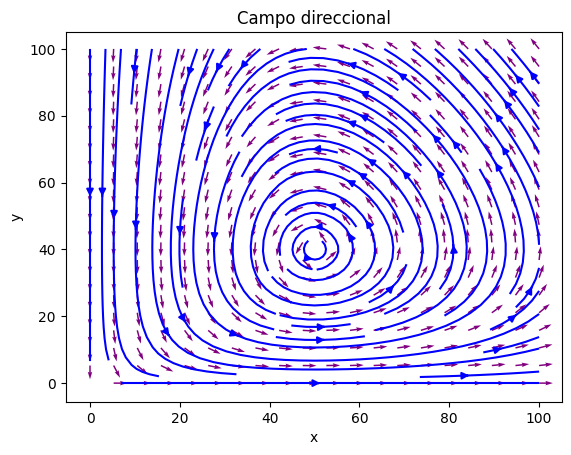

In [73]:
def F(x, y):
    dxdt = 0.2 * x - 0.005 * x * y
    dydt = -0.5 * y + 0.01 * x * y
    return np.array([dxdt, dydt])

# Call the function to plot the vector field
graficar_campo_direcciones(F, xmin=0, xmax=100, ymin=0, ymax=100, xstep=20, ystep=20, unitario=True, graficar_flujo=True)


Inciso b

In [78]:
def newton_multidimensional(F, DF, x0, maxIter, tol):
    x = x0
    approximations = [x0]
    eigenvalue = 0

    for i in range(maxIter):
        Fx = F(x)
        DFx = DF(x)
        delta_x = np.linalg.inv(DFx) @ -Fx
        x = x + delta_x
        approximations.append(x)

        if np.linalg.norm(delta_x, ord=2) < tol:
            eigenvalue = np.linalg.eigvals(DFx)
            break

    return approximations, x, eigenvalue

# Function representing the system of ODEs
def F(variables):
    x, y = variables
    return np.array([
        0.2 * x - 0.005 * x * y,
        -0.5 * y + 0.01 * x * y
    ])

# Jacobian matrix of the system
def DF(variables):
    x, y = variables
    return np.array([
        [0.2 - 0.005 * y, -0.005 * x],
        [0.01 * y, -0.5 + 0.01 * x]
    ])

In [86]:
def find_zeros(F, DF, initial_points, maxIter=100, tol=1e-7):
    zeros = []
    for x0 in initial_points:
        _, zero, eigenvalue = newton_multidimensional(F, DF, x0, maxIter, tol)
        if all(np.linalg.norm(zero - z, ord=2) >= tol for z in zeros):
            zeros.append([zero, eigenvalue])
    return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [np.array([0.0, 0.0]), np.array([0.0, 30.0]), np.array([45.0, 0.0]), np.array([50.0, 50.0])]

# Encontrar todos los ceros
zeros = find_zeros(F, DF, initial_points)
print("Ceros encontrados:")
for zero, eigenvalue in zeros:
    print("\nCero:",zero)
    print("Eigenvalue:", eigenvalue)

Ceros encontrados:

Cero: [0. 0.]
Eigenvalue: [ 0.2 -0.5]

Cero: [0. 0.]
Eigenvalue: [ 0.2 -0.5]

Cero: [0. 0.]
Eigenvalue: [ 0.2 -0.5]

Cero: [50. 40.]
Eigenvalue: [0.+0.31622777j 0.-0.31622777j]


Punto (0,0). Punto silla: las trayectorias se repelen desde el punto de silla a lo largo de una dirección y se atraen a lo largo de otra.
Punto (50,40). Espiral repulsor: las trayectorias se mueven en espiral, alejándose.

In [87]:
def population_system(t, z):
    x, y = z
    dxdt = 0.2 * x - 0.005 * x * y
    dydt = -0.5 * y + 0.01 * x * y
    return np.array([dxdt, dydt])


Inciso c

#### x′(t) = 0.2x − 0.005xy

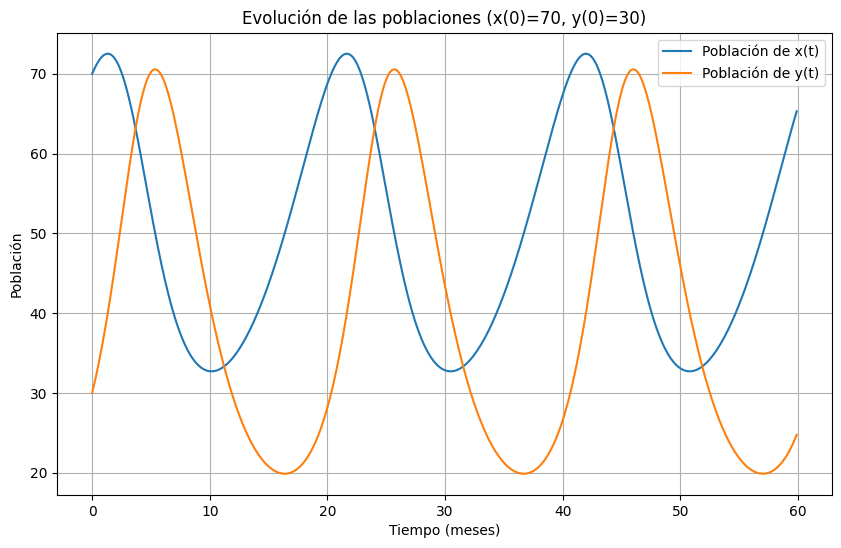

Población de x después de 5 años: 65.30923473678955
Población de y después de 5 años: 24.74922870341087
Periodo estimado para x(t): 20.350000000000165 meses
Periodo estimado para y(t): 20.300000000000193 meses


In [93]:
def solve_population_system_rk4(t0, u0, dt, tmax):
    t_values = []
    u_values = []

    t = t0
    u = u0

    while t <= tmax:
        t_values.append(t)
        u_values.append(u)

        u = rk4vec(t, u, dt, lambda t, u: population_system(t, u))
        t += dt

    return np.array(t_values), np.array(u_values)

# Condición inicial: x(0) = 70, y(0) = 30
t0 = 0.0
u0 = np.array([70.0, 30.0])
dt = 0.1
tmax = 60  # 5 años (60 meses)

t_values, u_values = solve_population_system_rk4(t0, u0, dt, tmax)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(t_values, u_values[:, 0], label='Población de x(t)')
plt.plot(t_values, u_values[:, 1], label='Población de y(t)')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('Evolución de las poblaciones (x(0)=70, y(0)=30)')
plt.legend()
plt.grid(True)
plt.show()

# Estimar población después de 5 años
x_5years = u_values[-1, 0]
y_5years = u_values[-1, 1]
print(f'Población de x después de 5 años: {x_5years}')
print(f'Población de y después de 5 años: {y_5years}')

# Find the peaks in the x population to estimate the period
peaks_x, _ = find_peaks(u_values[:, 0])

# Calculate the period by taking the difference between consecutive peaks
if len(peaks_x) > 1:
    period_x = np.mean(np.diff(t_values[peaks_x]))
    print(f'Periodo estimado para x(t): {period_x} meses')
else:
    print("No se encontraron suficientes picos para estimar el periodo.")

# Find the peaks in the y population to estimate the period
peaks_y, _ = find_peaks(u_values[:, 1])

# Calculate the period by taking the difference between consecutive peaks
if len(peaks_y) > 1:
    period_y = np.mean(np.diff(t_values[peaks_y]))
    print(f'Periodo estimado para y(t): {period_y} meses')
else:
    print("No se encontraron suficientes picos para estimar el periodo.")


Inciso d

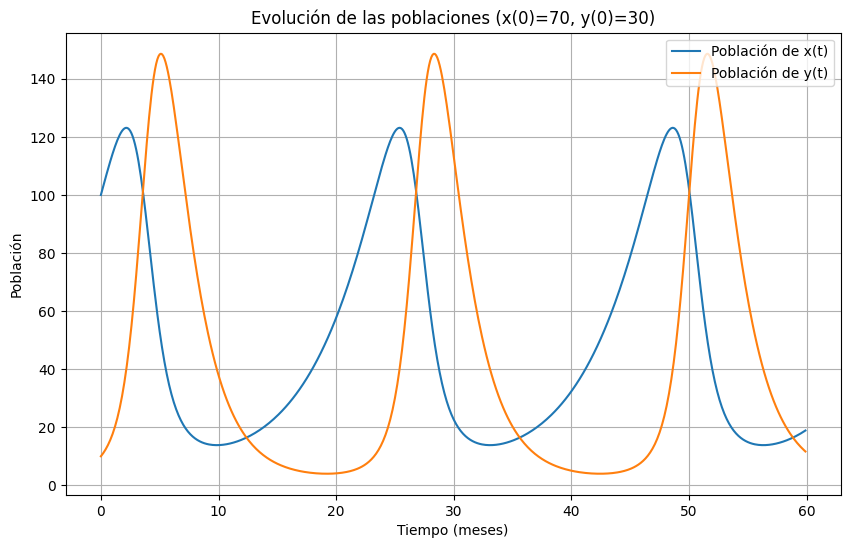

Población de x después de 5 años: 18.879369086974414
Población de y después de 5 años: 11.654076354921862
Periodo estimado para x(t): 23.20000000000021 meses
Periodo estimado para y(t): 23.250000000000234 meses


In [94]:
def solve_population_system_rk4(t0, u0, dt, tmax):
    t_values = []
    u_values = []

    t = t0
    u = u0

    while t <= tmax:
        t_values.append(t)
        u_values.append(u)

        u = rk4vec(t, u, dt, lambda t, u: population_system(t, u))
        t += dt

    return np.array(t_values), np.array(u_values)

# Condición inicial: x(0) = 70, y(0) = 30
t0 = 0.0
u0 = np.array([100.0, 10.0])
dt = 0.1
tmax = 60  # 5 años (60 meses)

t_values, u_values = solve_population_system_rk4(t0, u0, dt, tmax)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(t_values, u_values[:, 0], label='Población de x(t)')
plt.plot(t_values, u_values[:, 1], label='Población de y(t)')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('Evolución de las poblaciones (x(0)=70, y(0)=30)')
plt.legend()
plt.grid(True)
plt.show()

# Estimar población después de 5 años
x_5years = u_values[-1, 0]
y_5years = u_values[-1, 1]
print(f'Población de x después de 5 años: {x_5years}')
print(f'Población de y después de 5 años: {y_5years}')

# Find the peaks in the x population to estimate the period
peaks_x, _ = find_peaks(u_values[:, 0])

# Calculate the period by taking the difference between consecutive peaks
if len(peaks_x) > 1:
    period_x = np.mean(np.diff(t_values[peaks_x]))
    print(f'Periodo estimado para x(t): {period_x} meses')
else:
    print("No se encontraron suficientes picos para estimar el periodo.")

# Find the peaks in the y population to estimate the period
peaks_y, _ = find_peaks(u_values[:, 1])

# Calculate the period by taking the difference between consecutive peaks
if len(peaks_y) > 1:
    period_y = np.mean(np.diff(t_values[peaks_y]))
    print(f'Periodo estimado para y(t): {period_y} meses')
else:
    print("No se encontraron suficientes picos para estimar el periodo.")

Inciso e

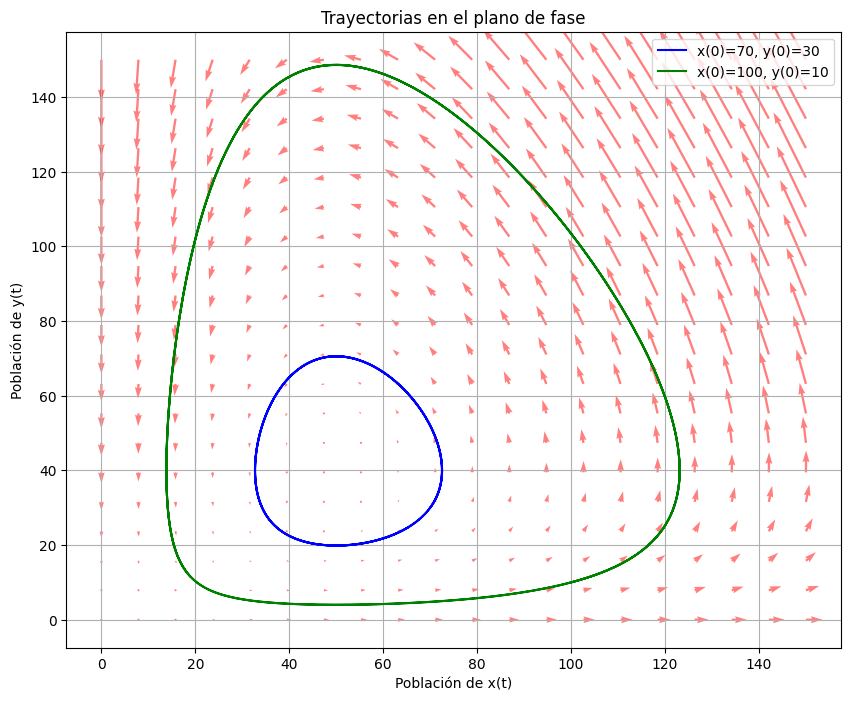

In [95]:
x = np.linspace(0, 150, 20)
y = np.linspace(0, 150, 20)

X, Y = np.meshgrid(x, y)
U = 0.2 * X - 0.005 * X * Y
V = -0.5 * Y + 0.01 * X * Y

plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, color='r', alpha=0.5)

# Graficar trayectorias
t_values1, u_values1 = solve_population_system_rk4(0, np.array([70.0, 30.0]), dt, tmax)
t_values2, u_values2 = solve_population_system_rk4(0, np.array([100.0, 10.0]), dt, tmax)

plt.plot(u_values1[:, 0], u_values1[:, 1], label='x(0)=70, y(0)=30', color='b')
plt.plot(u_values2[:, 0], u_values2[:, 1], label='x(0)=100, y(0)=10', color='g')

plt.xlabel('Población de x(t)')
plt.ylabel('Población de y(t)')
plt.title('Trayectorias en el plano de fase')
plt.legend()
plt.grid(True)
plt.show()


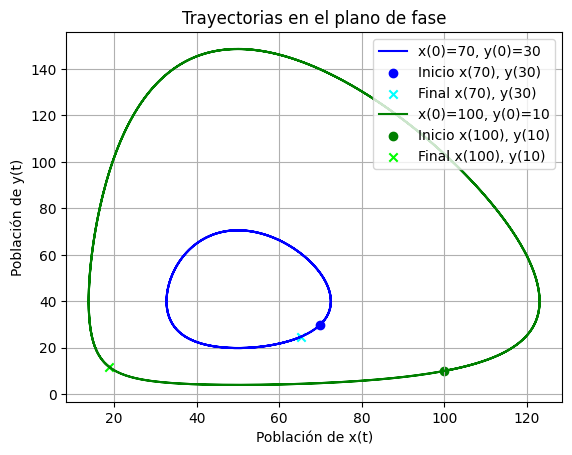

In [96]:
# Trayectoria 1: Condición inicial x(0) = 70, y(0) = 30
t_values1, u_values1 = solve_population_system_rk4(0, np.array([70.0, 30.0]), dt, tmax)
plt.plot(u_values1[:, 0], u_values1[:, 1], label='x(0)=70, y(0)=30', color='b')

# Marcar población inicial y final para la primera trayectoria
plt.scatter([u_values1[0, 0]], [u_values1[0, 1]], color='blue', label='Inicio x(70), y(30)', marker='o')
plt.scatter([u_values1[-1, 0]], [u_values1[-1, 1]], color='cyan', label='Final x(70), y(30)', marker='x')

# Trayectoria 2: Condición inicial x(0) = 100, y(0) = 10
t_values2, u_values2 = solve_population_system_rk4(0, np.array([100.0, 10.0]), dt, tmax)
plt.plot(u_values2[:, 0], u_values2[:, 1], label='x(0)=100, y(0)=10', color='g')

# Marcar población inicial y final para la segunda trayectoria
plt.scatter([u_values2[0, 0]], [u_values2[0, 1]], color='green', label='Inicio x(100), y(10)', marker='o')
plt.scatter([u_values2[-1, 0]], [u_values2[-1, 1]], color='lime', label='Final x(100), y(10)', marker='x')

# Configuraciones adicionales del gráfico
plt.xlabel('Población de x(t)')
plt.ylabel('Población de y(t)')
plt.title('Trayectorias en el plano de fase')
plt.legend()
plt.grid(True)
plt.show()


Inciso f

El comportamiento cualitativo del sistema poblacional se caracteriza por oscilaciones periódicas que reflejan las interacciones cíclicas entre las dos poblaciones, posiblemente representando la dinámica depredador-presa. El sistema es estable en el sentido de que continúa exhibiendo estos ciclos a lo largo del tiempo, y las poblaciones nunca llegan a cero (extinción) ni crecen sin límites. En cambio, se influyen entre sí de una manera que mantiene un equilibrio continuo, lo que conduce a ciclos predecibles y repetidos de crecimiento y declive.

## Ejercico No. 3

Inciso a

C:\Users\bcarr\AppData\Local\Temp\ipykernel_25340\841016398.py:18: RuntimeWarning: invalid value encountered in divide
  U, V = U / M, V / M


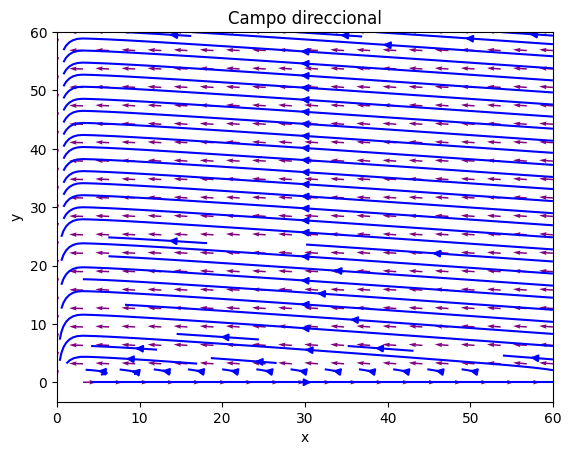

In [114]:
def F(x, y):
    dxdt = 0.5 * x - 0.001 * x**2 - x * y
    dydt = -0.2 * y + 0.1 * x * y
    return np.array([dxdt, dydt])

# Call the function to plot the vector field
graficar_campo_direcciones(F, xmin=0, xmax=60, ymin=0, ymax=60, xstep=20, ystep=20, unitario=True, graficar_flujo=True)

Inciso b

In [121]:
# Function representing the system of ODEs
def F(variables):
    x, y = variables
    return np.array([
        0.5 * x - 0.001 * x**2 - x * y,
        -0.2 * y + 0.1 * x * y
    ])

# Jacobian matrix of the system
def DF(variables):
    x, y = variables
    return np.array([
        [0.5 - 0.002 * x - y, -x],
        [0.1 * y, 0.1 * x - 0.2]
    ])

In [124]:
def find_zeros(F, DF, initial_points, maxIter=100, tol=1e-7):
    zeros = []
    for x0 in initial_points:
        _, zero, eigenvalue = newton_multidimensional(F, DF, x0, maxIter, tol)
        if all(np.linalg.norm(zero - z, ord=2) >= tol for z in zeros):
            zeros.append([zero, eigenvalue])
    return zeros

# Generar puntos iniciales (pueden ajustarse según el problema)
initial_points = [np.array([0.0, 0.0])]

# Encontrar todos los ceros
zeros = find_zeros(F, DF, initial_points)
print("Ceros encontrados:")
for zero, eigenvalue in zeros:
    print("\nCero:",zero)
    print("Eigenvalue:", eigenvalue)

Ceros encontrados:

Cero: [0. 0.]
Eigenvalue: [ 0.5 -0.2]


Punto (0,0). Punto silla: las trayectorias se repelen desde el punto de silla a lo largo de una dirección y se atraen a lo largo de otra.

In [126]:
def population_system(t, z):
    x, y = z
    dxdt = 0.5 * x - 0.001 * x**2 - x * y
    dydt = -0.2 * y + 0.1 * x * y
    return np.array([dxdt, dydt])

Inciso c

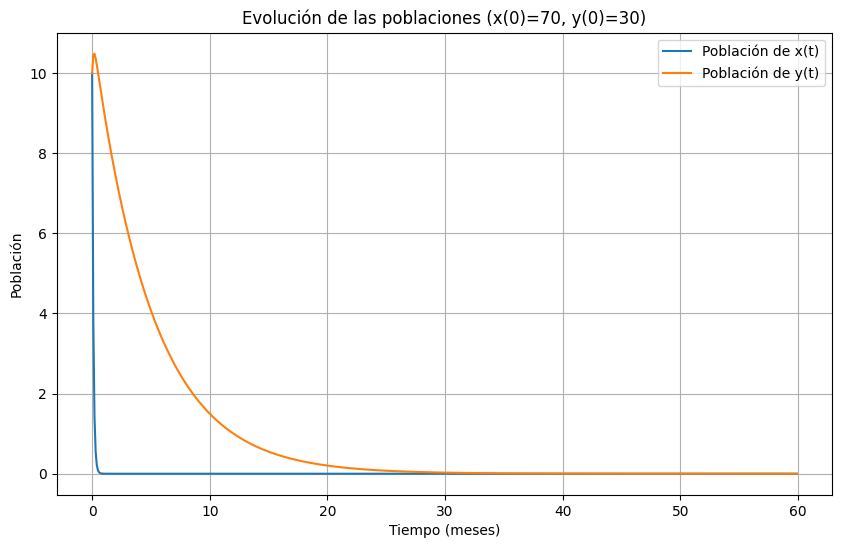

Población de x después de 5 años: 1.2596596564577207e-10
Población de y después de 5 años: 6.940532606964114e-05


In [131]:
def solve_population_system_rk4(t0, u0, dt, tmax):
    t_values = []
    u_values = []

    t = t0
    u = u0

    while t <= tmax:
        t_values.append(t)
        u_values.append(u)

        u = rk4vec(t, u, dt, lambda t, u: population_system(t, u))
        t += dt

    return np.array(t_values), np.array(u_values)

# Condición inicial: x(0) =  10, y(0) = 10
t0 = 0.0
u0 = np.array([10.0, 10.0])
dt = 0.1
tmax = 60  # 5 años (60 meses)

t_values, u_values = solve_population_system_rk4(t0, u0, dt, tmax)

# Graficar la solución
plt.figure(figsize=(10, 6))
plt.plot(t_values, u_values[:, 0], label='Población de x(t)')
plt.plot(t_values, u_values[:, 1], label='Población de y(t)')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Población')
plt.title('Evolución de las poblaciones (x(0)=70, y(0)=30)')
plt.legend()
plt.grid(True)
plt.show()

# Estimar población después de 5 años
x_5years = u_values[-1, 0]
y_5years = u_values[-1, 1]
print(f'Población de x después de 5 años: {x_5years}')
print(f'Población de y después de 5 años: {y_5years}')

Inciso d

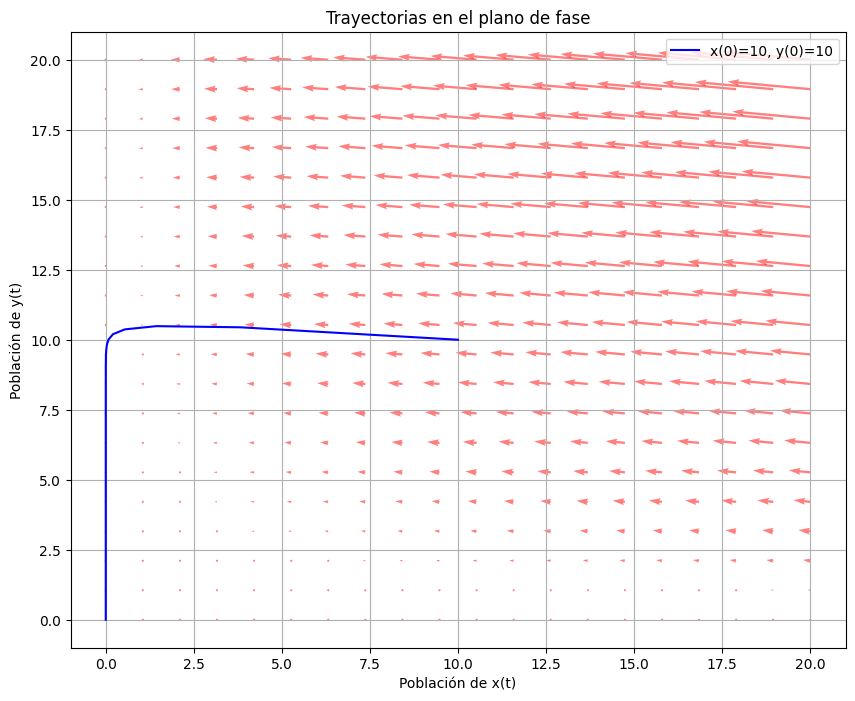

In [133]:
x = np.linspace(0, 20, 20)
y = np.linspace(0, 20, 20)

X, Y = np.meshgrid(x, y)
U = 0.5 * X - 0.001 * X**2 - X * Y
V = -0.2 * Y + 0.1 * X * Y

plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, color='r', alpha=0.5)

# Graficar trayectorias
t_values1, u_values1 = solve_population_system_rk4(0, np.array([10.0, 10.0]), dt, tmax)

plt.plot(u_values1[:, 0], u_values1[:, 1], label='x(0)=10, y(0)=10', color='b')

plt.xlabel('Población de x(t)')
plt.ylabel('Población de y(t)')
plt.title('Trayectorias en el plano de fase')
plt.legend()
plt.grid(True)
plt.show()


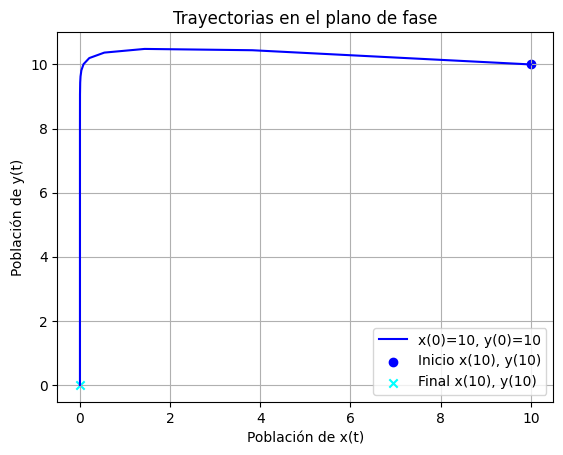

In [135]:
# Trayectoria 1: Condición inicial x(0) = 70, y(0) = 30
t_values1, u_values1 = solve_population_system_rk4(0, np.array([10.0, 10.0]), dt, tmax)
plt.plot(u_values1[:, 0], u_values1[:, 1], label='x(0)=10, y(0)=10', color='b')

# Marcar población inicial y final para la primera trayectoria
plt.scatter([u_values1[0, 0]], [u_values1[0, 1]], color='blue', label='Inicio x(10), y(10)', marker='o')
plt.scatter([u_values1[-1, 0]], [u_values1[-1, 1]], color='cyan', label='Final x(10), y(10)', marker='x')

# Configuraciones adicionales del gráfico
plt.xlabel('Población de x(t)')
plt.ylabel('Población de y(t)')
plt.title('Trayectorias en el plano de fase')
plt.legend()
plt.grid(True)
plt.show()


Inciso e

El sistema de población descrito por las ecuaciones diferenciales dadas es inestable en las condiciones proporcionadas. Ambas poblaciones son incapaces de mantenerse por sí mismas y finalmente colapsan hasta extinguirse.
Sin ciclos ni equilibrios estables. A diferencia de los sistemas típicos depredador-presa, donde pueden existir oscilaciones o equilibrios estables, este sistema no exhibe tal comportamiento. En cambio, el sistema tiende monótonamente hacia la extinción, sin signos de comportamiento periódico o coexistencia estable. El análisis del plano de fase muestra que todas las trayectorias conducen al origen, lo que confirma que la extinción es el destino final de ambas poblaciones en este modelo.

## Ejercicio 4

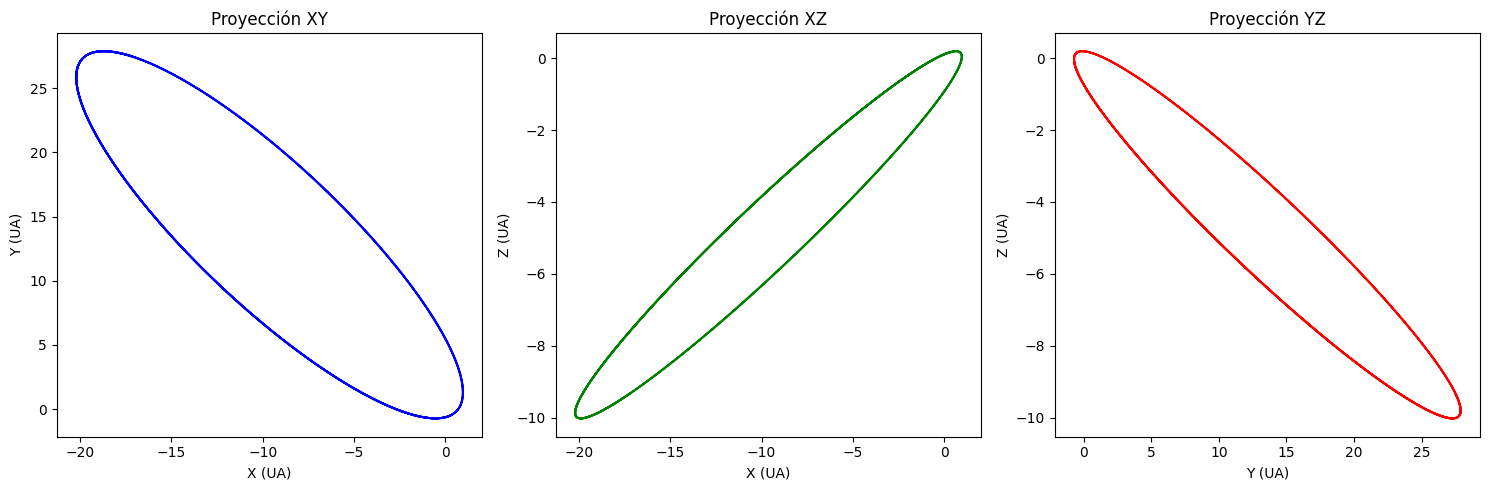

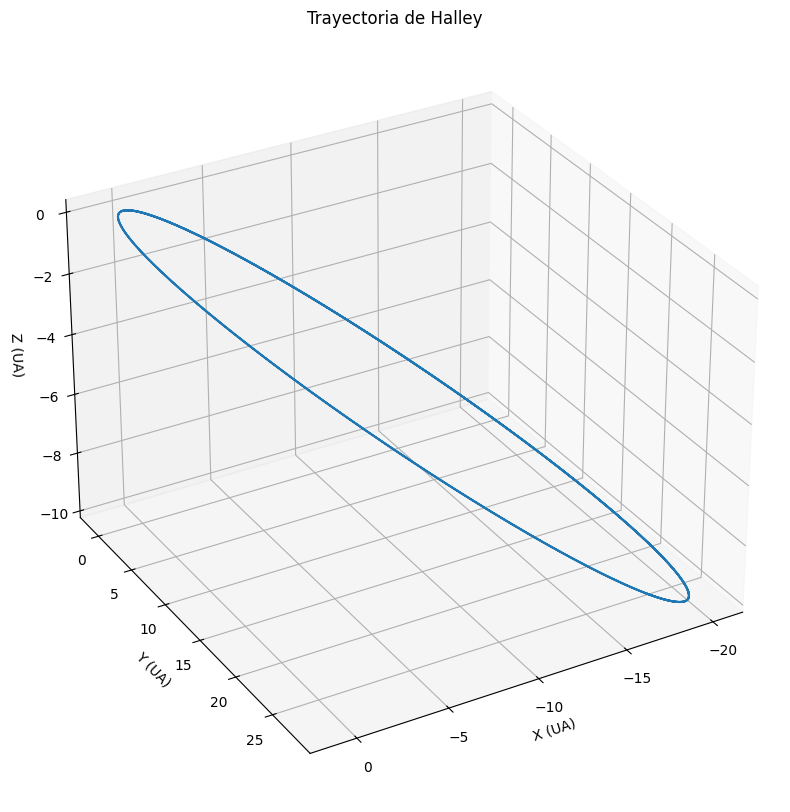

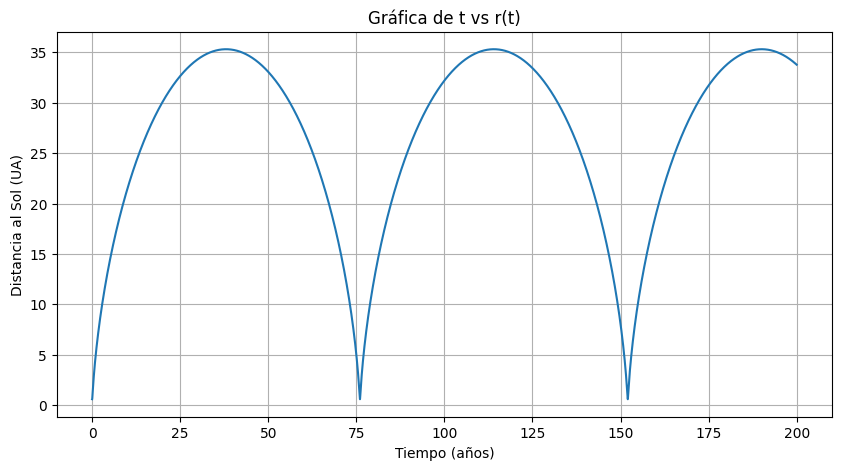

Posición y velocidad del cometa para t = 100 años (2086):
Posición: [-19.84859793  23.55073327  -9.3812164 ]
Velocidad: [-0.12558077  0.47299545 -0.11411926]

Posición y velocidad del cometa para t = 200 años (2186):
Posición: [-17.21450378  27.51326759  -9.33432931]
Velocidad: [ 0.32380227 -0.1439531   0.11243252]

El periodo estimado de Halley es de aproximadamente: 76.025 años


In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las constantes y condiciones iniciales
mu = 4 * np.pi**2
p0 = np.array([0.325514, -0.459460, 0.166229])
v0 = np.array([-9.096111, -6.916686, -1.305721])
y0 = np.hstack((p0, v0))

# Definir la función que representa el sistema de ecuaciones diferenciales
def halley_system(t, state):
    x, y, z, vx, vy, vz = state
    r = np.sqrt(x**2 + y**2 + z**2)
    ax = -mu * x / r**3
    ay = -mu * y / r**3
    az = -mu * z / r**3
    return np.array([vx, vy, vz, ax, ay, az])

# Implementar el método de Runge-Kutta de 4º orden (RK4)
def rk4_step(f, t, y, dt):
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2 * k1)
    k3 = f(t + dt/2, y + dt/2 * k2)
    k4 = f(t + dt, y + dt * k3)
    return y + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

def solve_halley_system_rk4(f, y0, t_span, dt):
    t0, tf = t_span
    t_values = np.arange(t0, tf + dt, dt)
    y_values = np.zeros((len(t_values), len(y0)))

    y = y0
    for i, t in enumerate(t_values):
        y_values[i] = y
        y = rk4_step(f, t, y, dt)
    
    return t_values, y_values

# Definir los parámetros de la simulación
t_span = (0, 200)  # Simulación para 200 años
dt = 200 / 100000  # Intervalo de tiempo para 100,000 puntos

# Integrar las ecuaciones de movimiento utilizando Runge-Kutta de cuarto orden (RK4)
t_values, y_values = solve_halley_system_rk4(halley_system, y0, t_span, dt)

# Extraer las soluciones
x, y, z = y_values[:, 0], y_values[:, 1], y_values[:, 2]

# Graficar las proyecciones xy, xz y yz de la trayectoria
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x, y, color='blue')
plt.title('Proyección XY')
plt.xlabel('X (UA)')
plt.ylabel('Y (UA)')

plt.subplot(1, 3, 2)
plt.plot(x, z, color='green')
plt.title('Proyección XZ')
plt.xlabel('X (UA)')
plt.ylabel('Z (UA)')

plt.subplot(1, 3, 3)
plt.plot(y, z, color='red')
plt.title('Proyección YZ')
plt.xlabel('Y (UA)')
plt.ylabel('Z (UA)')

plt.tight_layout()
plt.show()

# Gráfica de la trayectoria en 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title('Trayectoria de Halley')
ax.set_xlabel('X (UA)')
ax.set_ylabel('Y (UA)')
ax.set_zlabel('Z (UA)')

# Adjust the viewing angle
ax.view_init(elev=30, azim=60)

plt.show()

# Encontrar la posición y velocidad en t = 100 y t = 200 años
pos_100 = y_values[np.argmin(np.abs(t_values - 100)), :3]
vel_100 = y_values[np.argmin(np.abs(t_values - 100)), 3:]
pos_200 = y_values[np.argmin(np.abs(t_values - 200)), :3]
vel_200 = y_values[np.argmin(np.abs(t_values - 200)), 3:]

# Graficar r(t) contra t
r_t = np.sqrt(x**2 + y**2 + z**2)
plt.figure(figsize=(10, 5))
plt.plot(t_values, r_t)
plt.title('Gráfica de t vs r(t)')
plt.xlabel('Tiempo (años)')
plt.ylabel('Distancia al Sol (UA)')
plt.grid(True)
plt.show()

# Estimación del período de Halley basada en la identificación del punto más cercano al sol.
perihelion_indices = np.where((r_t < np.roll(r_t, 1)) & (r_t < np.roll(r_t, -1)))[0]
period_estimate = np.mean(np.diff(t_values[perihelion_indices]))

# Imprimir los resultados del inciso b y c
print("Posición y velocidad del cometa para t = 100 años (2086):")
print(f"Posición: {pos_100}")
print(f"Velocidad: {vel_100}\n")

print("Posición y velocidad del cometa para t = 200 años (2186):")
print(f"Posición: {pos_200}")
print(f"Velocidad: {vel_200}\n")

print(f"El periodo estimado de Halley es de aproximadamente: {period_estimate} años")
